In [1]:
datos=sc.textFile("restaurantes.csv")

In [19]:
info=datos.distinct().map(lambda a:a.split(","))\
                    .filter(lambda a:a[1]!="Not yet rated")\
                    .filter(lambda a:len(a)==3)\
                    .map(lambda a:(a[0],float(a[1]),a[2]))

info.take(10),info.count()

([("Benny's - Collection Only", 6.0, 'Fish & Chips'),
  ('Baan Thai', 5.0, 'Thai'),
  ('Bamboo Baboom', 4.0, 'Thai'),
  ('August Moon', 4.5, 'Chinese'),
  ("Bhaji's Takeaway", 5.0, 'Curry'),
  ('Abz BBQ Kitchen', 5.0, 'American'),
  ("Benny's", 5.0, 'Chinese'),
  ('Amigo Uk Pizza & Kebab', 3.0, 'Pizza'),
  ('Al-Faisal', 4.5, 'Middle Eastern'),
  ('BBQ Xpress', 4.5, 'American')],
 1692)

In [20]:
info.map(lambda a:a[1]).mean()

4.924645390070923

In [21]:
info.map(lambda a:a[1]).stats()

(count: 1692, mean: 4.924645390070923, stdev: 0.5725406275827821, max: 6.0, min: 1.0)

In [33]:
res=info.map(lambda a:(a[2],1))

res.reduceByKey(lambda a,b:a+b).sortBy(lambda a:-a[1]).take(5)

[('Curry', 622),
 ('Pizza', 335),
 ('Chinese', 121),
 ('Kebab', 104),
 ('Fish & Chips', 85)]

In [36]:
info.filter(lambda a:a[2]=="Curry").map(lambda a:a[1]).stats()

(count: 622, mean: 5.02491961414791, stdev: 0.4665046637014003, max: 6.0, min: 2.5)

In [37]:
info.filter(lambda a:a[2]=="Pizza").map(lambda a:a[1]).stats()

(count: 335, mean: 4.93134328358209, stdev: 0.5434024800189179, max: 6.0, min: 2.0)

In [47]:
import json
ventas=sc.textFile("ventas.json")

In [58]:
tabla=ventas.map(lambda a:json.loads(a))\
            .map(lambda a:(a.get("Producto"),
                           a.get("Precio"),
                           a.get("Año")))
tabla.collect()

[('moto', 1000.0, None),
 ('coche', 2000.0, None),
 ('bici', 200.0, None),
 ('coche', 3000.0, 2015.0)]

In [59]:
tablaDF=tabla.toDF(["Producto","Precio","Año"])

In [60]:
tablaDF.show()

+--------+------+------+
|Producto|Precio|   Año|
+--------+------+------+
|    moto|1000.0|  null|
|   coche|2000.0|  null|
|    bici| 200.0|  null|
|   coche|3000.0|2015.0|
+--------+------+------+



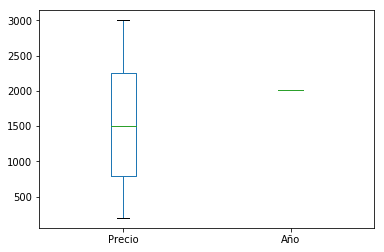

In [65]:
tablaDF.toPandas().plot.box()